# Naive Bayes - Iris
This project have the objective to demonstrate by a simple form the use of Naive Bayes model to classify the species of the iris.

The dataset used in this project was the ["Iris Species"](https://www.kaggle.com/uciml/iris).

# Libraries

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Data

In [2]:
# Importing the data
data = pd.read_csv('Iris.csv')

# Showing the 5 first values from our dataset
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Verifying the description of the dataset
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Visualizing and analyzing the data - Sepal

### Length

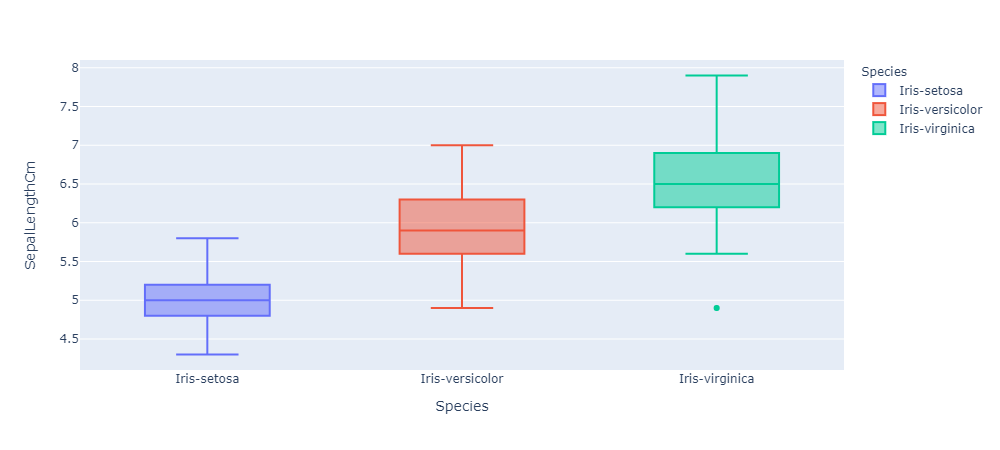

In [4]:
# Creating a box plot 
fig_sepal_length = px.box(data, x='Species', y='SepalLengthCm', color='Species')

# Showing the box plot
fig_sepal_length.show('png', width=1000, heigth=500)

Observations:
- The species Iris-setosa presents a shorter sepal length when compared to the other species;
- The dispersion of the data referring to this same species is also smaller when compared to the others, indicating a smaller variability in its length.

### Width

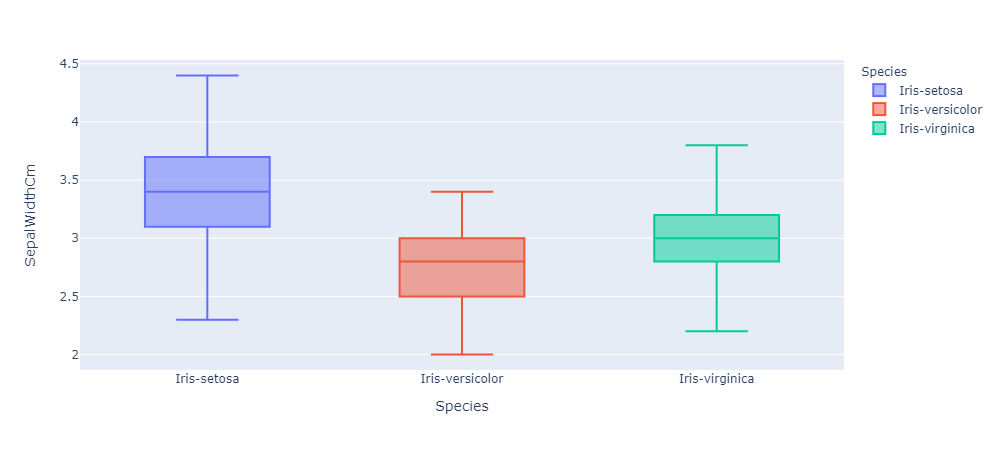

In [5]:
# Creating a box plot
fig_sepal_width = px.box(data, x='Species', y='SepalWidthCm', color='Species')

# Showing the box plot
fig_sepal_width.show('png', width=1000, heigth=500)

Observations:
- The species Iris-setosa  has a considerably larger sepal width than the other species;
- The species Iris-virginica  has the lowest sepal width variability


### Length x Width

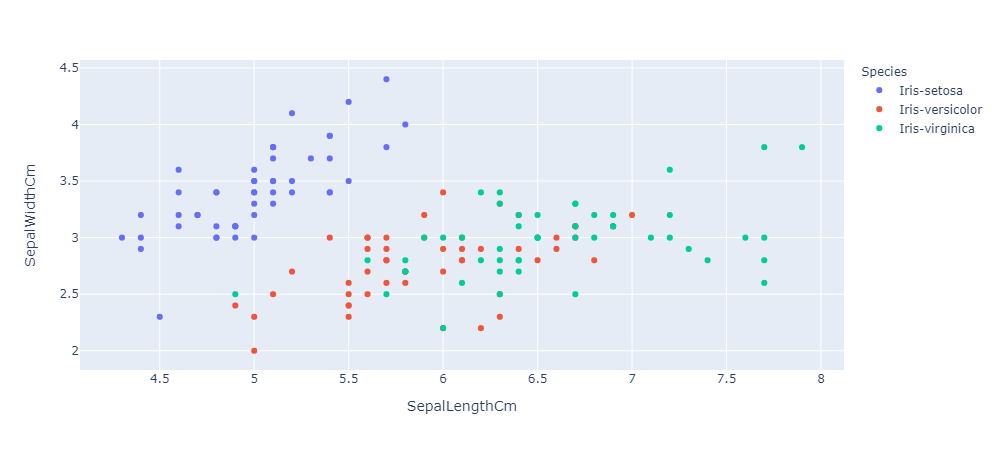

In [6]:
# Creating a scatter plot - Length x Width
fig_sepal_features = px.scatter(data, x='SepalLengthCm', y='SepalWidthCm', color='Species')

# Showing the scatter plot
fig_sepal_features.show('png', width=1000, heigth=500)

Observations:
- Analyzing the scatter plot we notice that characteristics of the sepal can be a good classifier for the species Iris-setosa.

# Visualizing and analyzing the data - Petal

### Length

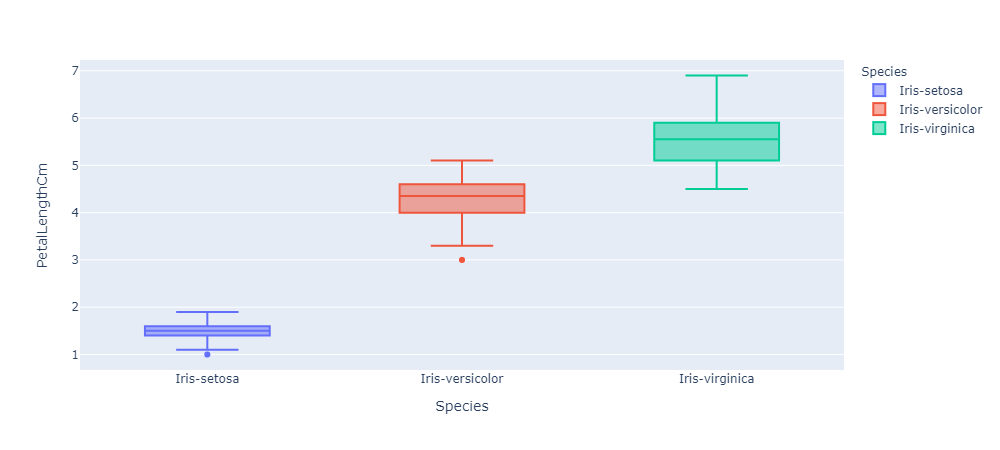

In [7]:
# Creating a box plot
fig_petal_length = px.box(data, x='Species', y='PetalLengthCm', color='Species')

# Showing the box plot
fig_petal_length.show('png', width=1000, heigth=500)

Observations:
 - Iris-setosa has the shorter petal length;
 - Iris-versicolor has an intermediate petal length;
 - Iris-versicolor has the bigger petal length;

### Width

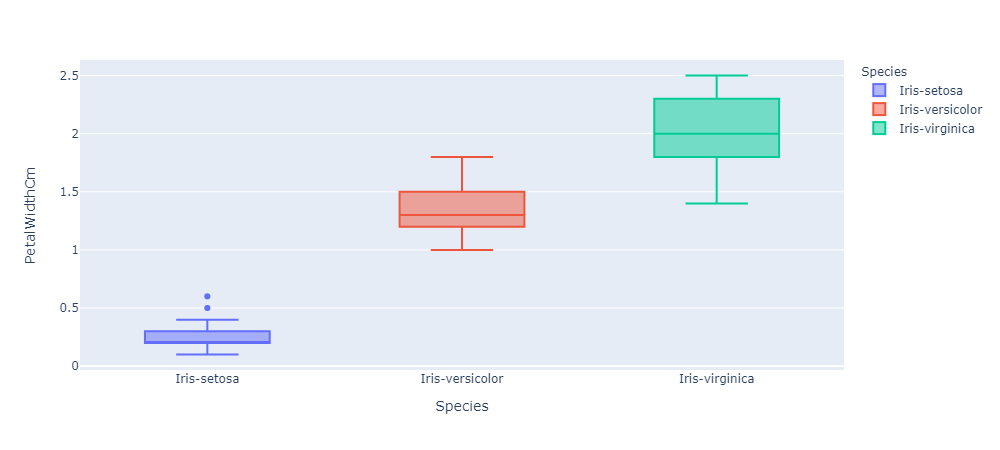

In [8]:
# Creating a box plot
fig_width_petal = px.box(data, x='Species', y='PetalWidthCm', color='Species')

# Showing the box plot
fig_width_petal.show('png', width=1000, heigth=500)

Observations:
 - Iris-setosa has the shorter petal width;
 - Iris-versicolor has an intermediate petal width;
 - Iris-versicolor has the bigger petal width;

### Length x Width

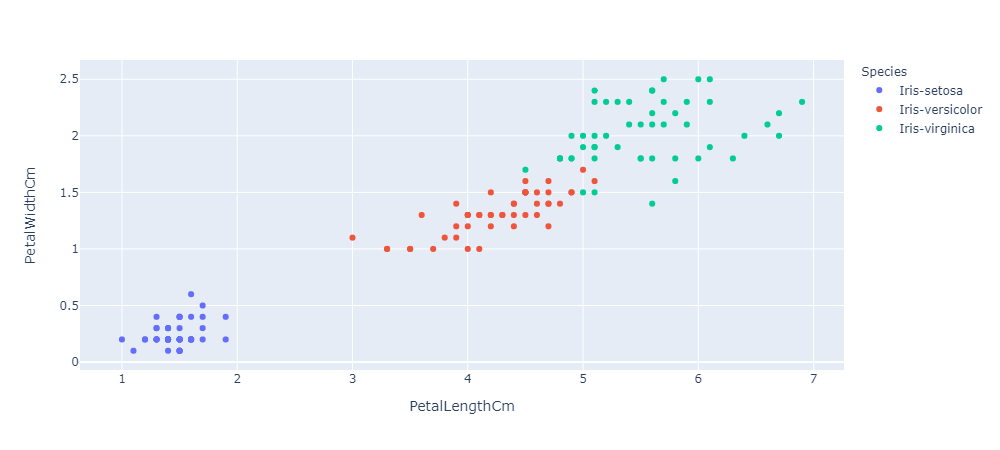

In [9]:
# Creating a scatter plot - Length x Width
fig_petal_features = px.scatter(data, x='PetalLengthCm', y='PetalWidthCm', color='Species')

# Showing the scatter plot
fig_petal_features.show('png', width=1000, heigth=500)

Observations:
- Differently of the sepal characteristics, when we compare the attributes of the petal in a scatter plot, we notice the existence of a better classifier among the species.

# Visualizing and analyzing the data - Median

In [10]:
# Creating a DataFrame with the median of all features per species
df_median = data.groupby(['Species'], as_index=False)[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].median()

# Showing the DataFrame
df_median

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,Iris-setosa,5.0,3.4,1.50,0.2
1,Iris-versicolor,5.9,2.8,4.35,1.3
2,Iris-virginica,6.5,3.0,5.55,2.0


Observations:
- This DataFrame is intended to demonstrate through the median the confirmation of the observations made previously through the graphs presented;
- We have chosen to use the median instead of the average, as this estimate is resistant to possible outliers in our data.

# Model - Naive Bayes

### Variables

In [11]:
# Defining the features
X = data.drop(['Species', 'Id'], axis=1)

# Defining the target
y = data['Species']

### Training and Testing

In [12]:
# Separating data in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #30% of the data will be for testing

### Naive Bayes Model

In [13]:
# Creating a Naive Bayes model
nb_model = GaussianNB()

# Training the model
nb_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Prediction

In [14]:
# Making predictions
prediction = nb_model.predict(X_test)

### Results - Model accuracy

In [15]:
# Defining model accuracy
accuracy =  accuracy_score(y_test, prediction)

# Showing the model accuracy
print("Model accuracy: %.2f%%" %(accuracy*100))

Model accuracy: 93.33%


In [16]:
# Defining number of hits
num_hits = accuracy_score(y_test, prediction, normalize=False)

# Showing the number of predictions
print('Number of predictions:', prediction.size)

# Showing the number of hits
print('Number of hits:', num_hits)

Number of predictions: 45
Number of hits: 42


### Results - Actual values x Predictions 

In [17]:
# Creating a DataFram to show the comparasion
df_comparasion = X_test

# Creating column for the actual values
df_comparasion['Actual values'] = y_test

# Creating column for the predicted values
df_comparasion['Predicted values'] = prediction

# Showing the 10 first values from our comparasion
df_comparasion.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Actual values,Predicted values
50,7.0,3.2,4.7,1.4,Iris-versicolor,Iris-versicolor
105,7.6,3.0,6.6,2.1,Iris-virginica,Iris-virginica
83,6.0,2.7,5.1,1.6,Iris-versicolor,Iris-virginica
124,6.7,3.3,5.7,2.1,Iris-virginica,Iris-virginica
129,7.2,3.0,5.8,1.6,Iris-virginica,Iris-virginica
6,4.6,3.4,1.4,0.3,Iris-setosa,Iris-setosa
146,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica,Iris-virginica
131,7.9,3.8,6.4,2.0,Iris-virginica,Iris-virginica
60,5.0,2.0,3.5,1.0,Iris-versicolor,Iris-versicolor
